 ## Karbondioksit Miktara Bağlı Özgül Isı Hesabı Algoritması

 importlarımız:

In [1]:
import numpy as np
import matplotlib.pyplot as mp


 yazılımda kullanacağımız matematiksel fonksiyonların tanımlanması:

In [2]:
#gerektiğinde fonksiyon üzerinde x değerini verip y değerine ulaşabilmemiz için kullanacağımız fonksiyon
def solveY(x, coefficientsi):
    coefficients = coefficientsi.copy()
    y = 0
    factorAmount = len(coefficients)
    countedFactorAmount = 0
    for factor in coefficients:
        xa = pow(x, factorAmount - countedFactorAmount - 1)
        y += factor * xa
        countedFactorAmount += 1
    return y

#polinomun türevini alacak fonksiyon
def derivePolynomial(coefficientsi):
    coefficients = coefficientsi.copy()
    derivedCoefficients = []
    polynomialLength = len(coefficients)
    countedCoefficients = 0
    while countedCoefficients < (polynomialLength - 1):
        coefficientPower = polynomialLength - countedCoefficients - 1
        derivedCoefficients.append(coefficients[countedCoefficients]*coefficientPower)
        countedCoefficients += 1
    #print(derivedCoefficients)
    return derivedCoefficients

#örnek gerçek değerlerimize en yakın, istediğimiz dereceden polinomu bulmamızı sağlayacak fonksyion
def smallestSquareClosestPolynomialMethod(polynomialLength, pointsi):
    points = pointsi.copy()

    numberOfPoints = len(points)
    #print("len(points)", len(points))
    coefficientsSideMatrix = np.zeros((numberOfPoints, polynomialLength))
    for pointIndex in range(numberOfPoints):
        arrayPiecePerPoint = np.zeros(polynomialLength)
        for factorIndex in range(polynomialLength):
            arrayPiecePerPoint[factorIndex] = pow(points[pointIndex][0], (polynomialLength - factorIndex - 1))
        coefficientsSideMatrix[pointIndex] = arrayPiecePerPoint

    valuesSideMatrix = np.zeros((numberOfPoints, 1))
    for pointIndex in range(numberOfPoints):
        valuesSideMatrix[pointIndex][0] = points[pointIndex][1]

    fT = np.dot(np.transpose(coefficientsSideMatrix), coefficientsSideMatrix)
    vT = np.dot(np.transpose(coefficientsSideMatrix), valuesSideMatrix)

    coefficientsResult = np.linalg.solve(fT, vT)

    return coefficientsResult




 kök bulma fonksiyonlarının tanımlanması

In [3]:
#bize istenen hata aralığında, polinom çarpanlarını verdiğimiz takdirde bisection yöntemi ile kabul edilebilir bir kök aralığı verecek fonksiyon
def bisection(coefficientsi, rangeIni, errorMargin):
    coefficients = coefficientsi.copy()
    rangeIn = rangeIni.copy()

    #print("rangeIn: ", rangeIn)

    #verilen aralığın sınırlarında y değerlerinin hesaplanması
    limitValues = [solveY(rangeIn[0], coefficients), solveY(rangeIn[1], coefficients)]
    #print("limit values: ", limitValues[0], ", ", limitValues[1])

    #eğer sınır değerlerinin ortasında bir tek katlı kök yoksa kodun durdurulması
    if ((limitValues[0] * limitValues[1] > 0) == True):
        #print("Secilen aralik uygun bir aralik degil.")
        return [None, None]

    #değerler arasındaki fark hata payından büyük olduğu sürece yeni bir aralık hesaplanması
    while (abs(limitValues[1] - limitValues[0]) <= errorMargin) == 0:

        #bulunan aralığın sınırlarından herhangi biri kökün kendisi mi diye kontrol edilmesi
        if limitValues[0] == 0:
            #print("\nBir cozum bulundu!: " + str(rangeIn[0]))
            rangeIn[1] = rangeIn[0]
            return rangeIn
        if limitValues[1] == 0:
            #print("\nBir cozum bulundu!: " + str(rangeIn[1]))
            rangeIn[0] = rangeIn[1]
            return rangeIn

        #bisection yöntemine göre yeni limitin seçilmesi
        newLimit = (rangeIn[0] + rangeIn[1])/2

        #yeni limitin aralıkta gerekli yerine yerleştirilmesi
        newLimitY = solveY(newLimit, coefficients)
        if (newLimitY * limitValues[0] > 0):
            rangeIn[0] = newLimit
            limitValues[0] = newLimitY
        else:
            rangeIn[1] = newLimit
            limitValues[1] = newLimitY

    return rangeIn

#bisection yöntemi kullanılarak x için bir değer bulunması için kullanılacak fonksiyon
def findXWithBisection(coefficientsi, rangeIni, errorMargin, yToSolveXFor):
    coefficients = coefficientsi.copy()
    rangeIn = rangeIni.copy()

    #istenen y noktasının bulunabilmesi için polinomun düzenlenmesi
    coefficients[-1] -= yToSolveXFor

    #bisection işleminin yapılması
    acceptableRange = bisection(coefficients, rangeIn, errorMargin)
    if acceptableRange[0] == None:
        return None

    #sonuç olarak bulunan aralığın ortasındaki değerin x değeri olarak kabul edilip döndürülmesi
    return (acceptableRange[0] + acceptableRange[1])/2

#bize istenen hata aralığında, polinom çarpanlarını verdiğimiz takdirde regula-falsi yöntemi ile kabul edilebilir bir kök aralığı verecek fonksiyon
def regulaFalsi(coefficientsi, rangeIni, errorMargin):
    coefficients = coefficientsi.copy()
    rangeIn = rangeIni.copy()

    #verilen aralığın sınırlarında y değerlerinin hesaplanması
    limitValues = [solveY(rangeIn[0], coefficients), solveY(rangeIn[1], coefficients)]

    #eğer sınır değerlerinin ortasında bir tek katlı kök yoksa kodun durdurulması
    if ((limitValues[0] * limitValues[1] > 0) == True):
        #print("Secilen aralik uygun bir aralik degil.")
        return [None, None]

    #değerler arasındaki fark hata payından büyük olduğu sürece yeni bir aralık hesaplanması
    while (abs(limitValues[1] - limitValues[0]) <= errorMargin) == 0:

        #bulunan aralığın sınırlarından herhangi biri kökün kendisi mi diye kontrol edilmesi
        if limitValues[0] == 0:
            #print("\nBir cozum bulundu!: " + str(rangeIn[0]))
            rangeIn[1] = rangeIn[0]
            return rangeIn
        if limitValues[1] == 0:
            #print("\nBir cozum bulundu!: " + str(rangeIn[1]))
            rangeIn[0] = rangeIn[1]
            return rangeIn

        #regulaFalsi yöntemine göre yeni limitin seçilmesi
        newLimit = (rangeIn[0]*solveY(rangeIn[1], coefficients) - rangeIn[1]*solveY(rangeIn[0], coefficients))/(solveY(rangeIn[1], coefficients) - solveY(rangeIn[0], coefficients))
        #print(newLimit)

        #yeni limitin aralıkta gerekli yerine yerleştirilmesi
        newLimitY = solveY(newLimit, coefficients)
        if (newLimitY * limitValues[0] > 0):
            rangeIn[1] = newLimit
            limitValues[1] = newLimitY
        else:
            rangeIn[0] = newLimit
            limitValues[0] = newLimitY

    return rangeIn

#regula-falsi yöntemi kullanılarak x için bir değer bulunması için kullanılacak fonksiyon
def findXWithRegulaFalsi(coefficientsi, rangeIni, errorMargin, yToSolveXFor):
    coefficients = coefficientsi.copy()
    rangeIn = rangeIni.copy()

    #istenen y noktasının bulunabilmesi için polinomun düzenlenmesi
    coefficients[-1] -= yToSolveXFor

    #regula-falsi işleminin yapılması
    acceptableRange = regulaFalsi(coefficients, rangeIn, errorMargin)
    if acceptableRange[0] == None:
        return None

    #sonuç olarak bulunan aralığın ortasındaki değerin x değeri olarak kabul edilip döndürülmesi
    return (acceptableRange[0] + acceptableRange[1])/2

#newton-raphson yöntemi ile denklem için kök bulma
def newtonRaphson(coefficientsi, initialGuess, errorMargin):
    coefficients = coefficientsi.copy()

    #polinomun türevinin alınması
    fd = derivePolynomial(coefficients)

    #hata payı kabul edilebilir olana kadar yeni iterasyon denenmesi
    newGuess = initialGuess - (solveY(initialGuess, coefficients)/solveY(initialGuess, fd))
    #print(f"{initialGuess} -> {newGuess}")
    while (abs(newGuess - initialGuess) > errorMargin):
        initialGuess = newGuess
        newGuess = initialGuess - (solveY(initialGuess, coefficients)/solveY(initialGuess, fd))
        #print(f"{initialGuess} -> {newGuess}")

    return newGuess

#newton-raphson yöntemi kullanılarak x için bir değer bulunması için kullanılacak fonksiyon
def findXWithNewtonRaphson(coefficientsi, initialGuess, errorMargin, yToSolveFor):
    coefficients = coefficientsi.copy()

    #istenen y noktasının bulunabilmesi için polinomun düzenlenmesi
    coefficients[-1] -= yToSolveFor

    return newtonRaphson(coefficients, initialGuess, errorMargin)

#secant yöntemi ile denklem için kök bulma
def secant(coefficientsi, oldGuess, initialGuess, errorMargin):
    coefficients = coefficientsi.copy()

    #hata payı kabul edilebilir olana kadar yeni iterasyon denenmesi
    newGuess = initialGuess - ( (solveY(initialGuess, coefficients)*(initialGuess - oldGuess)) / (solveY(initialGuess, coefficients) - solveY(oldGuess, coefficients)) )
    #print(f"{initialGuess} -> {newGuess}")
    while (abs(newGuess - initialGuess) > errorMargin):
        oldGuess = initialGuess
        initialGuess = newGuess
        newGuess = initialGuess - ( (solveY(initialGuess, coefficients)*(initialGuess - oldGuess)) / (solveY(initialGuess, coefficients) - solveY(oldGuess, coefficients)) )
        #print(f"{initialGuess} -> {newGuess}")

    return newGuess

#secant yöntemi kullanılarak x için bir değer bulunması için kullanılacak fonksiyon
def findXWithSecant(coefficientsi, oldGuess, initialGuess, errorMargin, yToSolveFor):
    coefficients = coefficientsi.copy()

    #istenen y noktasının bulunabilmesi için polinomun düzenlenmesi
    coefficients[-1] -= yToSolveFor

    return secant(coefficients, oldGuess, initialGuess, errorMargin)




 fonksiyonların kullanılarak farklı dereceden polinomların denenmesi ve grafiklerinin görüntülenmesi

2 . dereceden polinom için mean squared error değerimiz:  3154.926097235746
3 . dereceden polinom için mean squared error değerimiz:  134.7317761722952
4 . dereceden polinom için mean squared error değerimiz:  4.339223732799292
5 . dereceden polinom için mean squared error değerimiz:  0.7559645645320415
6 . dereceden polinom için mean squared error değerimiz:  0.11721127554774284
7 . dereceden polinom için mean squared error değerimiz:  0.020747952908277512


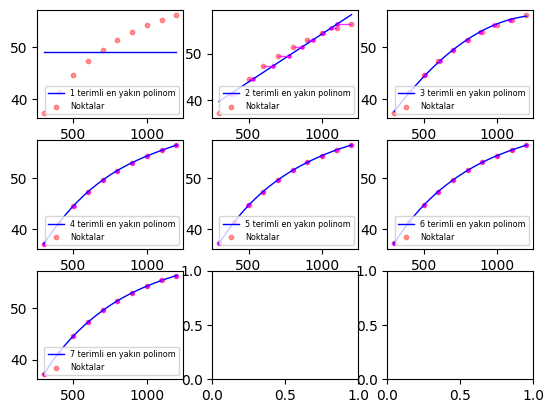

In [4]:
###
# NIST WebBook verilerinden alından değerlerin girilmesi (https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Type=JANAFG&Table=on)
inputPoints = np.array([
    [300, 37.22],
    [400, 41.34],
    [500, 44.61],
    [600, 47.32],
    [700, 49.57],
    [800, 51.44],
    [900, 53.00],
    [1000, 54.30],
    [1100, 55.40],
    [1200, 56.35]
])
polynomialLengthsToTry = 7      #kaçıncı dereceden polinoma kadar deneneceğinin girilmesi
###

pointsCount = len(inputPoints)

width = 0
height = 0
while (width * height < polynomialLengthsToTry):
    if width == height: width += 1
    else: height += 1

fig, ax = mp.subplots(height, width)

xAxis = np.linspace(inputPoints[0][0] - 2, inputPoints[-1][0] + 2, 100)

yAxes = []
nearXPoints = []
nearXPointsErrors = []
for plotIndex in range(polynomialLengthsToTry):
    #print(plotIndex, ": in this plot index, the xAxis is: ", xAxis)
    currentPolynomial = smallestSquareClosestPolynomialMethod(plotIndex + 1, inputPoints)
    yAxes.append(np.zeros(len(xAxis)))
    for coefficientIndex in range(plotIndex + 1):
        coefficientPower = plotIndex - coefficientIndex
        yAxes[-1] += currentPolynomial[coefficientIndex]*(xAxis**coefficientPower)

    nearXPoints.append([])
    nearXPointsErrors.append([])
    for pointIndex in range(len(inputPoints)):

        resultFromGraph = findXWithBisection(currentPolynomial, [inputPoints[0][0] - 2, inputPoints[-1][0] + 2], 0.001, inputPoints[pointIndex][1])

        nearXPoints[-1].append([resultFromGraph, inputPoints[pointIndex][1]])
        if resultFromGraph != None:
            nearXPointsErrors[-1].append(resultFromGraph - inputPoints[pointIndex][0])
        else:
            nearXPointsErrors[-1].append(None)

nearXPointsMeanSquaredErrors = []
for plotIndex in range(len(yAxes)):
    currentError = 0
    nearXPointsErrorsCount = len(nearXPointsErrors[plotIndex])
    for error in nearXPointsErrors[plotIndex]:
        if error != None:
            currentError += error**2
        else:
            nearXPointsErrorsCount -= 1

    if (nearXPointsErrorsCount != None) and (nearXPointsErrorsCount != 0):
        currentError /= nearXPointsErrorsCount
    else:
        currentError = None
    nearXPointsMeanSquaredErrors.append(currentError)

for x in range(height):
    for y in range(width):
        if x*width + y > len(yAxes) - 1:
            continue
        #print("plotlarımız heigth: ", height, ", width: ", width, ", ve şu anda ilgilenilen: ", x, ", ", y, ", x*width + y:", x*width + y)
        ax[x][y].plot(xAxis, yAxes[(x*width + y)], color = "blue", linewidth = 1, label = f"{(x*width + y + 1)} terimli en yakın polinom")
        ax[x][y].scatter(inputPoints[:, 0], inputPoints[:, 1], color = "red", s = 10, label = "Noktalar", alpha = 0.4)

        ##
        for pointIndex in range(len(nearXPoints[x*width + y])):
            point = nearXPoints[x*width + y][pointIndex]
            #print("point: ", point[0])
            if point[0] != None:
                ax[x][y].plot([point[0], inputPoints[pointIndex][0]], [point[1], inputPoints[pointIndex][1]], color = "magenta", linewidth = 1, alpha = 0.8)
                ax[x][y].scatter(point[0], point[1], color = "magenta", s = 5, alpha = 1)
        ##

        ax[x][y].legend(fontsize = "xx-small")
        ax[x][y].xlabel = "x"
        ax[x][y].ylabel = "y"

        if nearXPointsMeanSquaredErrors[x*width + y] != None:
            print(x*width + y + 1, ". dereceden polinom için mean squared error değerimiz: ", nearXPointsMeanSquaredErrors[x*width + y])



""" nearPoints = np.zeros((pointsCount, 1))
for pointIndex in range(pointsCount):
    nearPoints[pointIndex] = findXWithBisection() """

mp.show()





